### Import the necessary liberaries

In [1]:
import sys
sys.path.append('../scripts/')

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb
from dotenv import load_dotenv
from datetime import datetime 
from calculations import calculate_z_scores, summarize_statistics
from load_data import load_csv
from data_cleaning import clean_data, replace_negative_values

%matplotlib inline

### Load the dataset

In [3]:
# Load environment variables from .env file
load_dotenv()
togo_file = os.getenv('TOGO_FILE')
togo_df = load_csv(togo_file)

Successfully loaded data from //home/izzy/KAIM/KAIM-C2/src/data/togo-dapaong_qc.csv


In [4]:
togo_df.head(5)

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [5]:
togo_df.shape

(525600, 19)

**View basic information about the datasets**

 >Get an overview of the dataset, including the number of rows and columns.

In [6]:
print(togo_df.dtypes)

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object


### Clean the data


**Handle Missing Values**

> Identify missing values and decide how to handle them (e.g., imputation, removal)

**Check for Duplicates:** 

>Identify and remove duplicate rows if necessary.

In [7]:
# Convert the 'Timestamp' column to datetime format for benin Dataframe and drop the comments column

togo_df = clean_data(togo_df, 'Timestamp')

In [8]:
# togo_df.shape
# togo_df.head(5)
togo_df.info()
# togo_df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

### Summary Statistics

In [9]:
# Calculate summary statistics for all numeric columns
summary_statistics = summarize_statistics(togo_df)
print("\nSummary Statistics:\n", summary_statistics)


Summary Statistics:
                   count        mean         std    min    25%    50%      75%  \
GHI            525600.0  230.555040  322.532347  -12.7   -2.2    2.1  442.400   
DNI            525600.0  151.258469  250.956962    0.0    0.0    0.0  246.400   
DHI            525600.0  116.444352  156.520714    0.0    0.0    2.5  215.700   
ModA           525600.0  226.144375  317.346938    0.0    0.0    4.4  422.525   
ModB           525600.0  219.568588  307.932510    0.0    0.0    4.3  411.000   
Tamb           525600.0   27.751788    4.758023   14.9   24.2   27.2   31.100   
RH             525600.0   55.013160   28.778732    3.3   26.5   59.3   80.800   
WS             525600.0    2.368093    1.462668    0.0    1.4    2.2    3.200   
WSgust         525600.0    3.229490    1.882565    0.0    1.9    2.9    4.400   
WSstdev        525600.0    0.557740    0.268923    0.0    0.4    0.5    0.700   
WD             525600.0  161.741845   91.877217    0.0   74.8  199.1  233.500   
WDstde

### Data Quality Check

In [10]:
# Replace negative values with zero
togo_df = replace_negative_values(togo_df)

In [11]:
togo_df

Date  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25  0.0  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25  0.0  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25  0.0  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25  0.0  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25  0.0  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...            ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-10-24  0.0  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24  0.0  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24  0.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24  0.0  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25  0.0  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

        WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0           0.4  227.6      1.1  977         0            0.0   24.7   24.4  
1           0.4  229.3      0.7  977         0            0.0   24.7   24.4  
2           0.3  228.5      2.9  977         0            0.0   24.7   24.4  
3           0.3  229.1      4.6  977         0            0.0   24.7   24.4  
4           0.4  227.5      1.6  977         0            0.0   24.7   24.4  
...         ...    ...      ...  ...       ...            ...    ...    ...  
525595      0.0    0.0      0.0  977         0            0.0   24.3   24.0  
525596      0.0    0.0      0.0  977         0            0.0   24.3   24.0  
525597      0.0    0.0      0.0  977         0            0.0   24.2   23.9  
525598      0.0    0.0      0.0  977         0            0.0   24.1   23.8  
525599      0.0    0.0      0.0  977         0            0.0   24.1   23.8  

[525600 rows x 18 columns]

>The IQR method calculates the interquartile range (IQR) and identifies outliers as those values falling outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR].
It flags rows where any of the selected columns have values outside the calculated IQR boundaries.

In [12]:
# Columns to check for outliers
cols_check = ['ModA', 'ModB', 'WS', 'WSgust']

Q1 = togo_df[cols_check].quantile(0.25)
Q3 = togo_df[cols_check].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((togo_df[cols_check] < (Q1 - 1.5 * IQR)) | (togo_df[cols_check] > (Q3 + 1.5 * IQR))).any(axis=1)
print(f"Outliers detected using IQR:\n{togo_df[outliers_iqr][cols_check]}")


Outliers detected using IQR:
          ModA    ModB   WS  WSgust
674     1140.0  1126.0  1.3     2.1
675     1133.0  1118.0  1.6     2.1
681     1063.0  1049.0  1.7     2.4
682     1047.0  1033.0  1.8     2.6
683     1042.0  1028.0  1.9     2.4
...        ...     ...  ...     ...
523567   766.2   739.5  5.4     8.2
523568   765.0   738.2  6.2     8.2
523589   701.6   676.6  4.9     8.4
523628   554.2   533.0  4.7     8.2
523629   549.4   528.5  6.1     7.9

[11459 rows x 4 columns]


### Time Series Analysis

In [13]:
# Set 'Date' as the index
togo_df.set_index('Date', inplace=True)

# Plot line graphs for GHI, DNI, DHI, and Tamb
plt.figure(figsize=(30, 15))

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

In [14]:
# Display unique values in the 'Date' column
# togo_df.columns
# unique_date_values = togo_df['Date'].unique()
# print("Unique values in 'Date' column:", unique_date_values)

# togo_df = togo_df.reset_index()
togo_df

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  WSstdev  \
Date                                                                      
2021-10-25  0.0  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1      0.4   
2021-10-25  0.0  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6      0.4   
2021-10-25  0.0  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4      0.3   
2021-10-25  0.0  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6      0.3   
2021-10-25  0.0  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6      0.4   
...         ...  ...  ...   ...   ...   ...   ...  ...     ...      ...   
2022-10-24  0.0  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0      0.0   
2022-10-24  0.0  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0      0.0   
2022-10-24  0.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0      0.0   
2022-10-24  0.0  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0      0.0   
2022-10-25  0.0  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0      0.0   

               WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
Date                                                                    
2021-10-25  227.6      1.1  977         0            0.0   24.7   24.4  
2021-10-25  229.3      0.7  977         0            0.0   24.7   24.4  
2021-10-25  228.5      2.9  977         0            0.0   24.7   24.4  
2021-10-25  229.1      4.6  977         0            0.0   24.7   24.4  
2021-10-25  227.5      1.6  977         0            0.0   24.7   24.4  
...           ...      ...  ...       ...            ...    ...    ...  
2022-10-24    0.0      0.0  977         0            0.0   24.3   24.0  
2022-10-24    0.0      0.0  977         0            0.0   24.3   24.0  
2022-10-24    0.0      0.0  977         0            0.0   24.2   23.9  
2022-10-24    0.0      0.0  977         0            0.0   24.1   23.8  
2022-10-25    0.0      0.0  977         0            0.0   24.1   23.8  

[525600 rows x 17 columns]

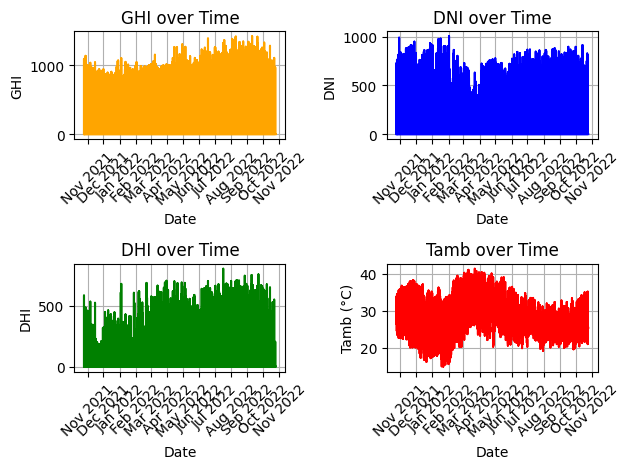

In [16]:
# Apply tight layout to prevent label overlap
plt.tight_layout()

# Line plot for GHI
plt.subplot(2, 2, 1)
plt.plot(togo_df['GHI'], label='GHI', color='orange')
plt.title('GHI over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.ylabel('GHI')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # One tick per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Jan 2024', 'Feb 2024', etc.

# Line plot for DNI
plt.subplot(2, 2, 2)
plt.plot(togo_df['DNI'], label='DNI', color='blue')
plt.title('DNI over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.ylabel('DNI')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # One tick per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Jan 2024', 'Feb 2024', etc.

# Line plot for DHI
plt.subplot(2, 2, 3)
plt.plot(togo_df['DHI'], label='DHI', color='green')
plt.title('DHI over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.ylabel('DHI')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # One tick per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Jan 2024', 'Feb 2024', etc.

# Line plot for Tamb
plt.subplot(2, 2, 4)
plt.plot(togo_df['Tamb'], label='Tamb', color='red')
plt.title('Tamb over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.ylabel('Tamb (°C)')
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # One tick per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Jan 2024', 'Feb 2024', etc.
plt.tight_layout()
plt.show()

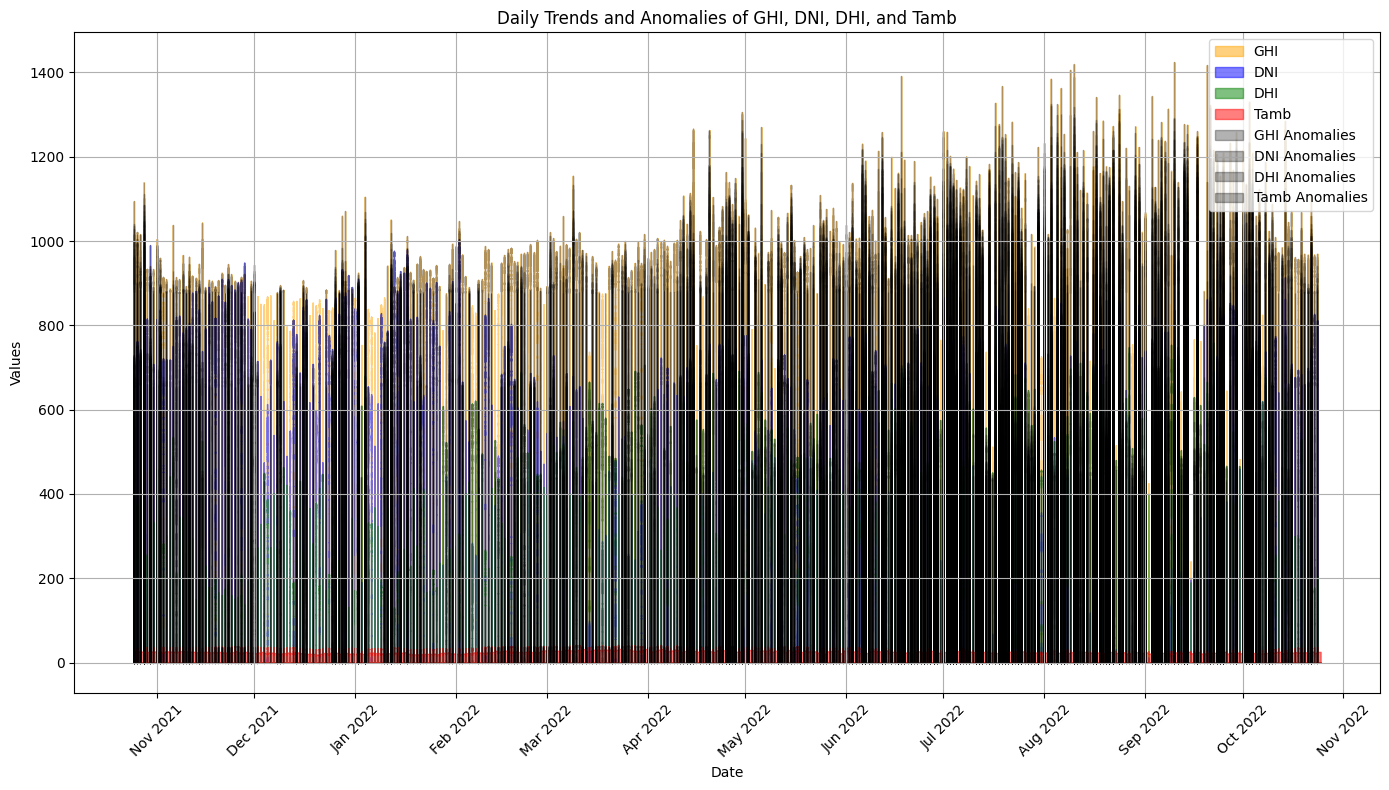

In [17]:
plt.figure(figsize=(14, 8))

# Plot GHI
plt.fill_between(togo_df.index, togo_df['GHI'], color='orange', alpha=0.5, label='GHI')

# Plot DNI
plt.fill_between(togo_df.index, togo_df['DNI'], color='blue', alpha=0.5, label='DNI')

# Plot DHI
plt.fill_between(togo_df.index, togo_df['DHI'], color='green', alpha=0.5, label='DHI')

# Plot Tamb
plt.fill_between(togo_df.index, togo_df['Tamb'], color='red', alpha=0.5, label='Tamb')

# Highlight anomalies
thresholds = {
    'GHI': togo_df['GHI'].mean() + 2 * togo_df['GHI'].std(),
    'DNI': togo_df['DNI'].mean() + 2 * togo_df['DNI'].std(),
    'DHI': togo_df['DHI'].mean() + 2 * togo_df['DHI'].std(),
    'Tamb': togo_df['Tamb'].mean() + 2 * togo_df['Tamb'].std()
}

for col, thresh in thresholds.items():
    plt.fill_between(togo_df.index, 0, togo_df[col], where=(togo_df[col] > thresh), color='black', alpha=0.3, label=f'{col} Anomalies')

# Set title and labels
plt.title('Daily Trends and Anomalies of GHI, DNI, DHI, and Tamb')
plt.xlabel('Date')
plt.ylabel('Values')

# Format x-axis for dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # One tick per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Jan 2024', 'Feb 2024', etc.

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add legend and grid
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Plot Sensor Readings with Cleaning Indicator**

In [18]:
togo_df[['Cleaning','ModA','ModB']].describe()

Cleaning           ModA           ModB
count  525600.000000  525600.000000  525600.000000
mean        0.000535     226.144375     219.568588
std         0.023116     317.346938     307.932510
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.000000       4.400000       4.300000
75%         0.000000     422.525000     411.000000
max         1.000000    1380.000000    1367.000000

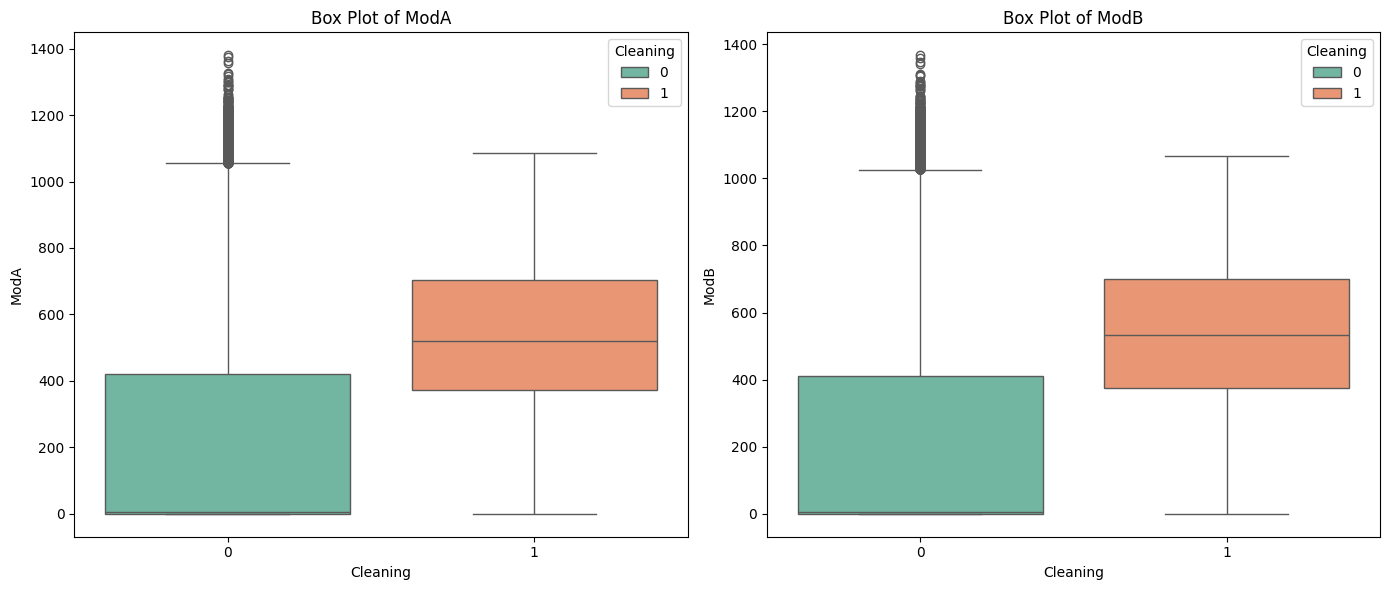

In [19]:

plt.figure(figsize=(14, 6))

# Box plot for ModA
plt.subplot(1, 2, 1)
sb.boxplot(x='Cleaning', y='ModA', data=togo_df, hue='Cleaning', palette='Set2')
plt.title('Box Plot of ModA')

# Box plot for ModB
plt.subplot(1, 2, 2)
sb.boxplot(x='Cleaning', y='ModB', data=togo_df, hue='Cleaning', palette='Set2')
plt.title('Box Plot of ModB')

plt.tight_layout()
plt.show();

In [20]:
# Compute summary statistics grouped by 'Cleaning'
summary_stats = togo_df.groupby('Cleaning')[['ModA', 'ModB']].describe()
print(summary_stats)


              ModA                                                            \
             count        mean         std  min    25%    50%    75%     max   
Cleaning                                                                       
0         525319.0  225.979064  317.303768  0.0    0.0    4.3  422.0  1380.0   
1            281.0  535.186477  237.849443  0.0  373.7  521.2  704.9  1086.0   

              ModB                                                            
             count        mean         std  min    25%    50%    75%     max  
Cleaning                                                                      
0         525319.0  219.401351  307.882893  0.0    0.0    4.2  410.4  1367.0  
1            281.0  532.211744  233.107743  0.0  376.1  532.1  699.6  1068.0  


### Correlation Analysis

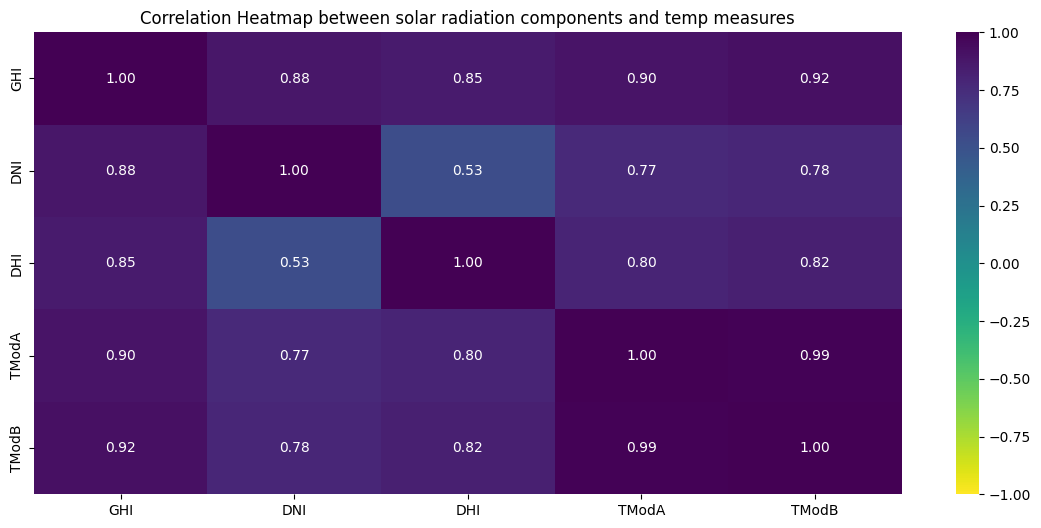

In [21]:
# Compute the correlation matrix
corr_matrix = togo_df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()

# Plot the heatmap
plt.figure(figsize=(14, 6))
sb.heatmap(corr_matrix, annot=True, cmap='viridis_r', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap between solar radiation components and temp measures')
plt.show()


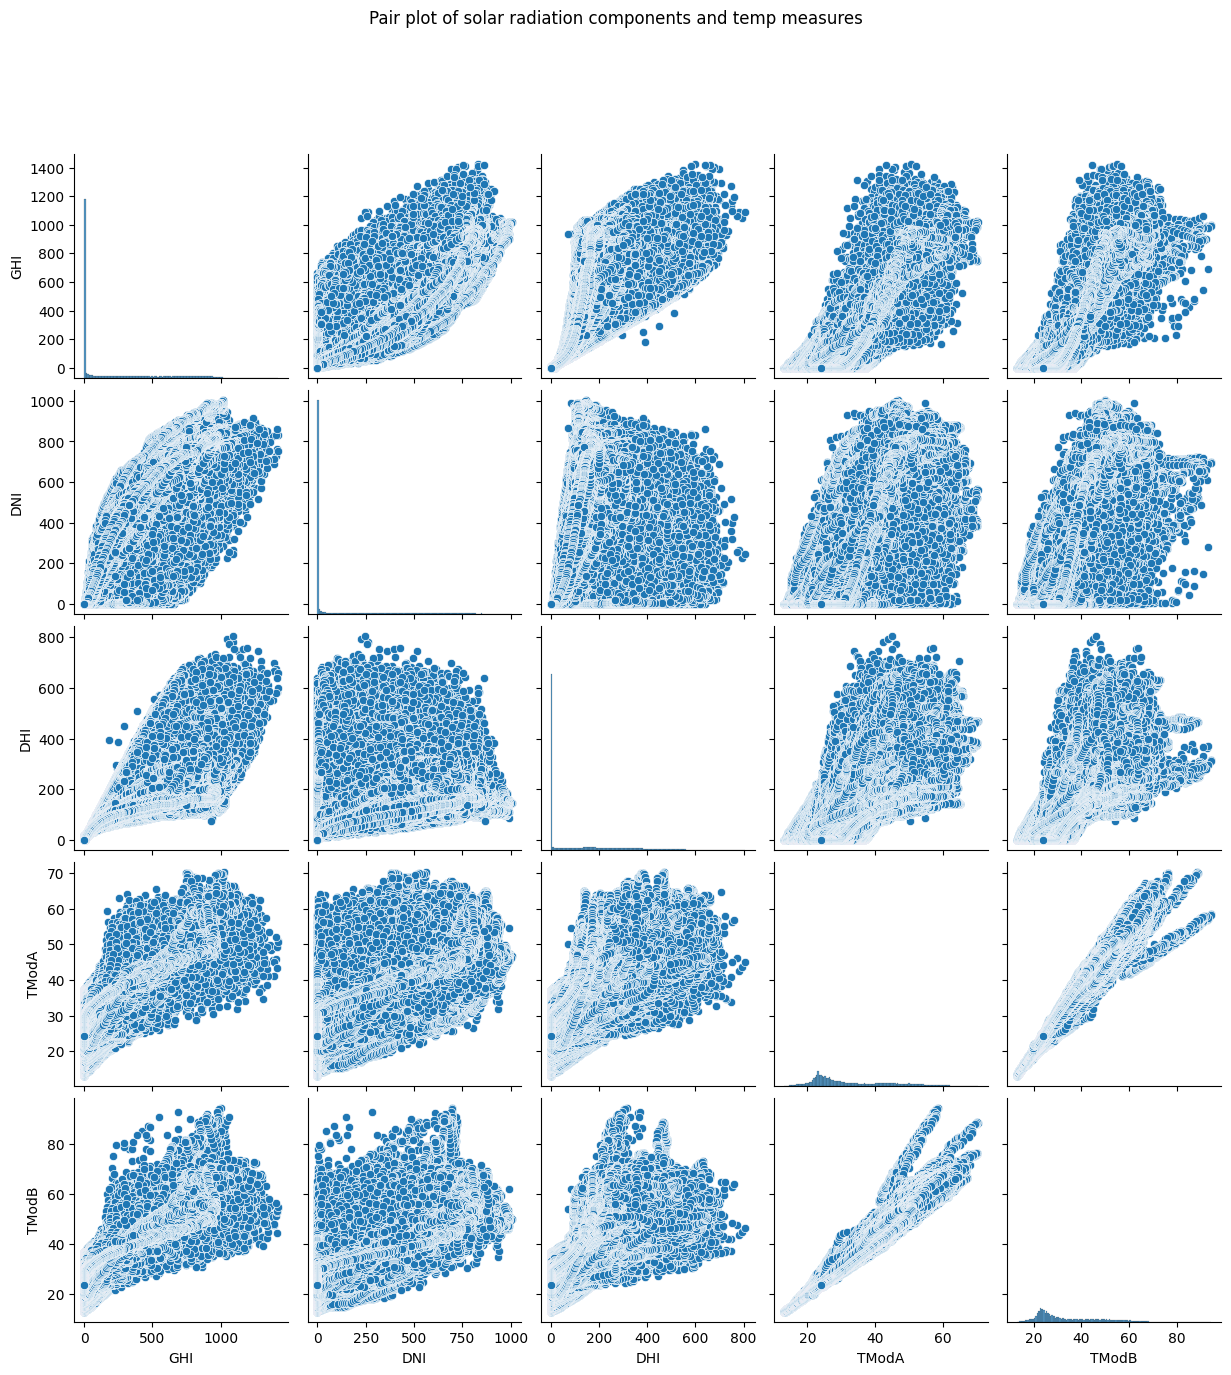

In [22]:
# or pair plot
sb.pairplot(togo_df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']])
plt.suptitle('Pair plot of solar radiation components and temp measures', y=1.1)
plt.show()

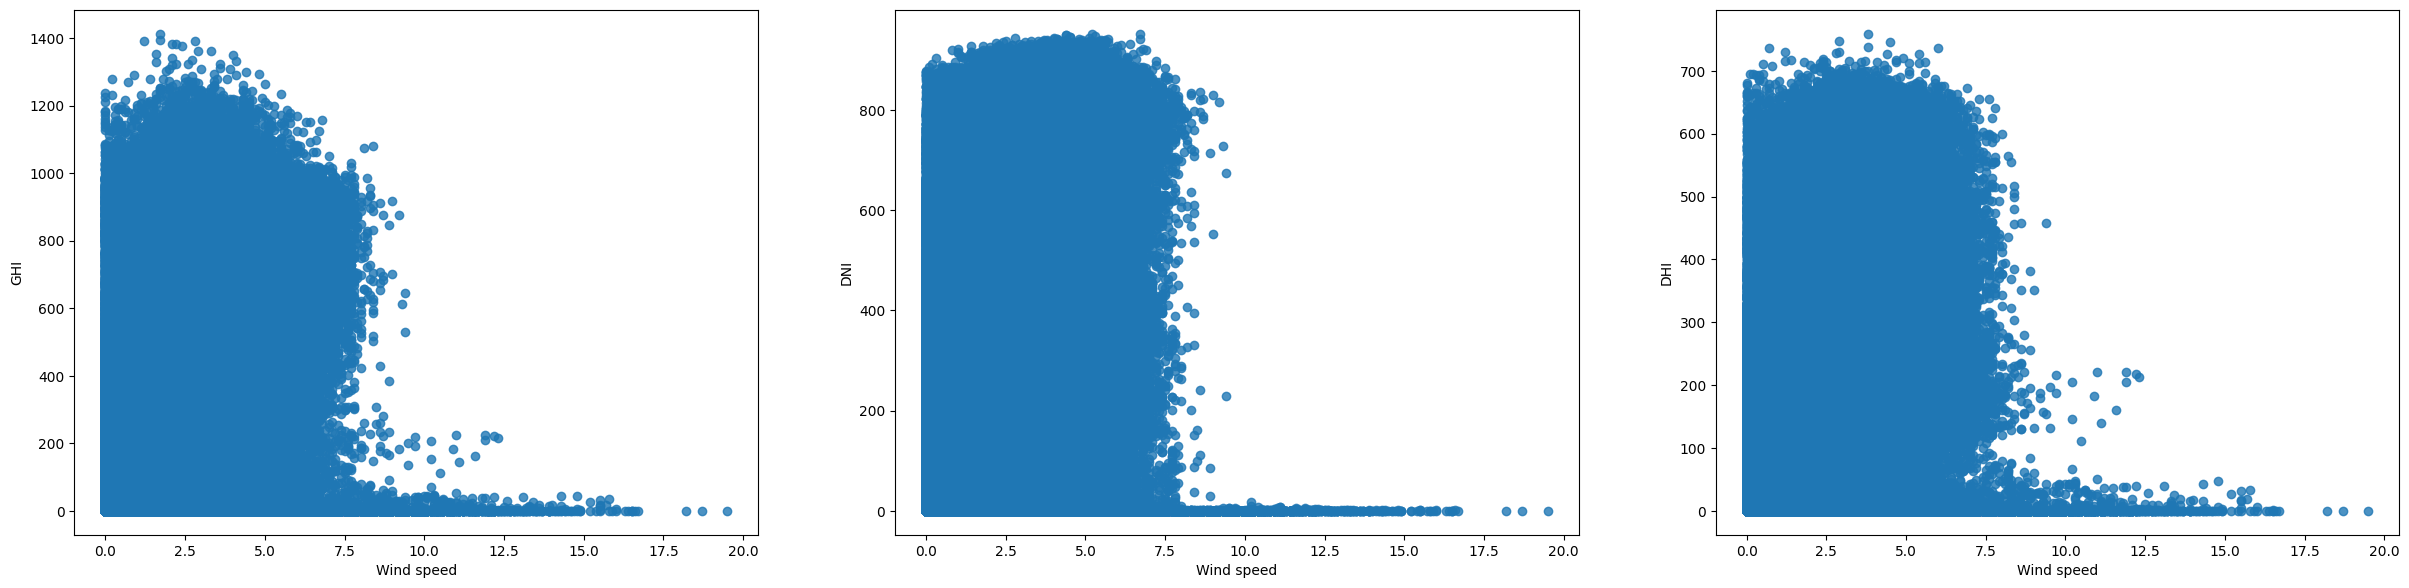

In [34]:
plt.figure(figsize=(30, 15))

plt.subplot(2, 3, 1)
sb.regplot(data = togo_df, x = 'WS', y = 'GHI',fit_reg=False);
plt.xlabel('Wind speed')
plt.ylabel('GHI')

plt.subplot(2, 3, 2)
sb.regplot(data = togo_df, x = 'WS', y = 'DNI',fit_reg=False);
plt.xlabel('Wind speed')
plt.ylabel('DNI')

plt.subplot(2, 3, 3)
sb.regplot(data = togo_df, x = 'WS', y = 'DHI',fit_reg=False);
plt.xlabel('Wind speed')
plt.ylabel('DHI')

plt.show();

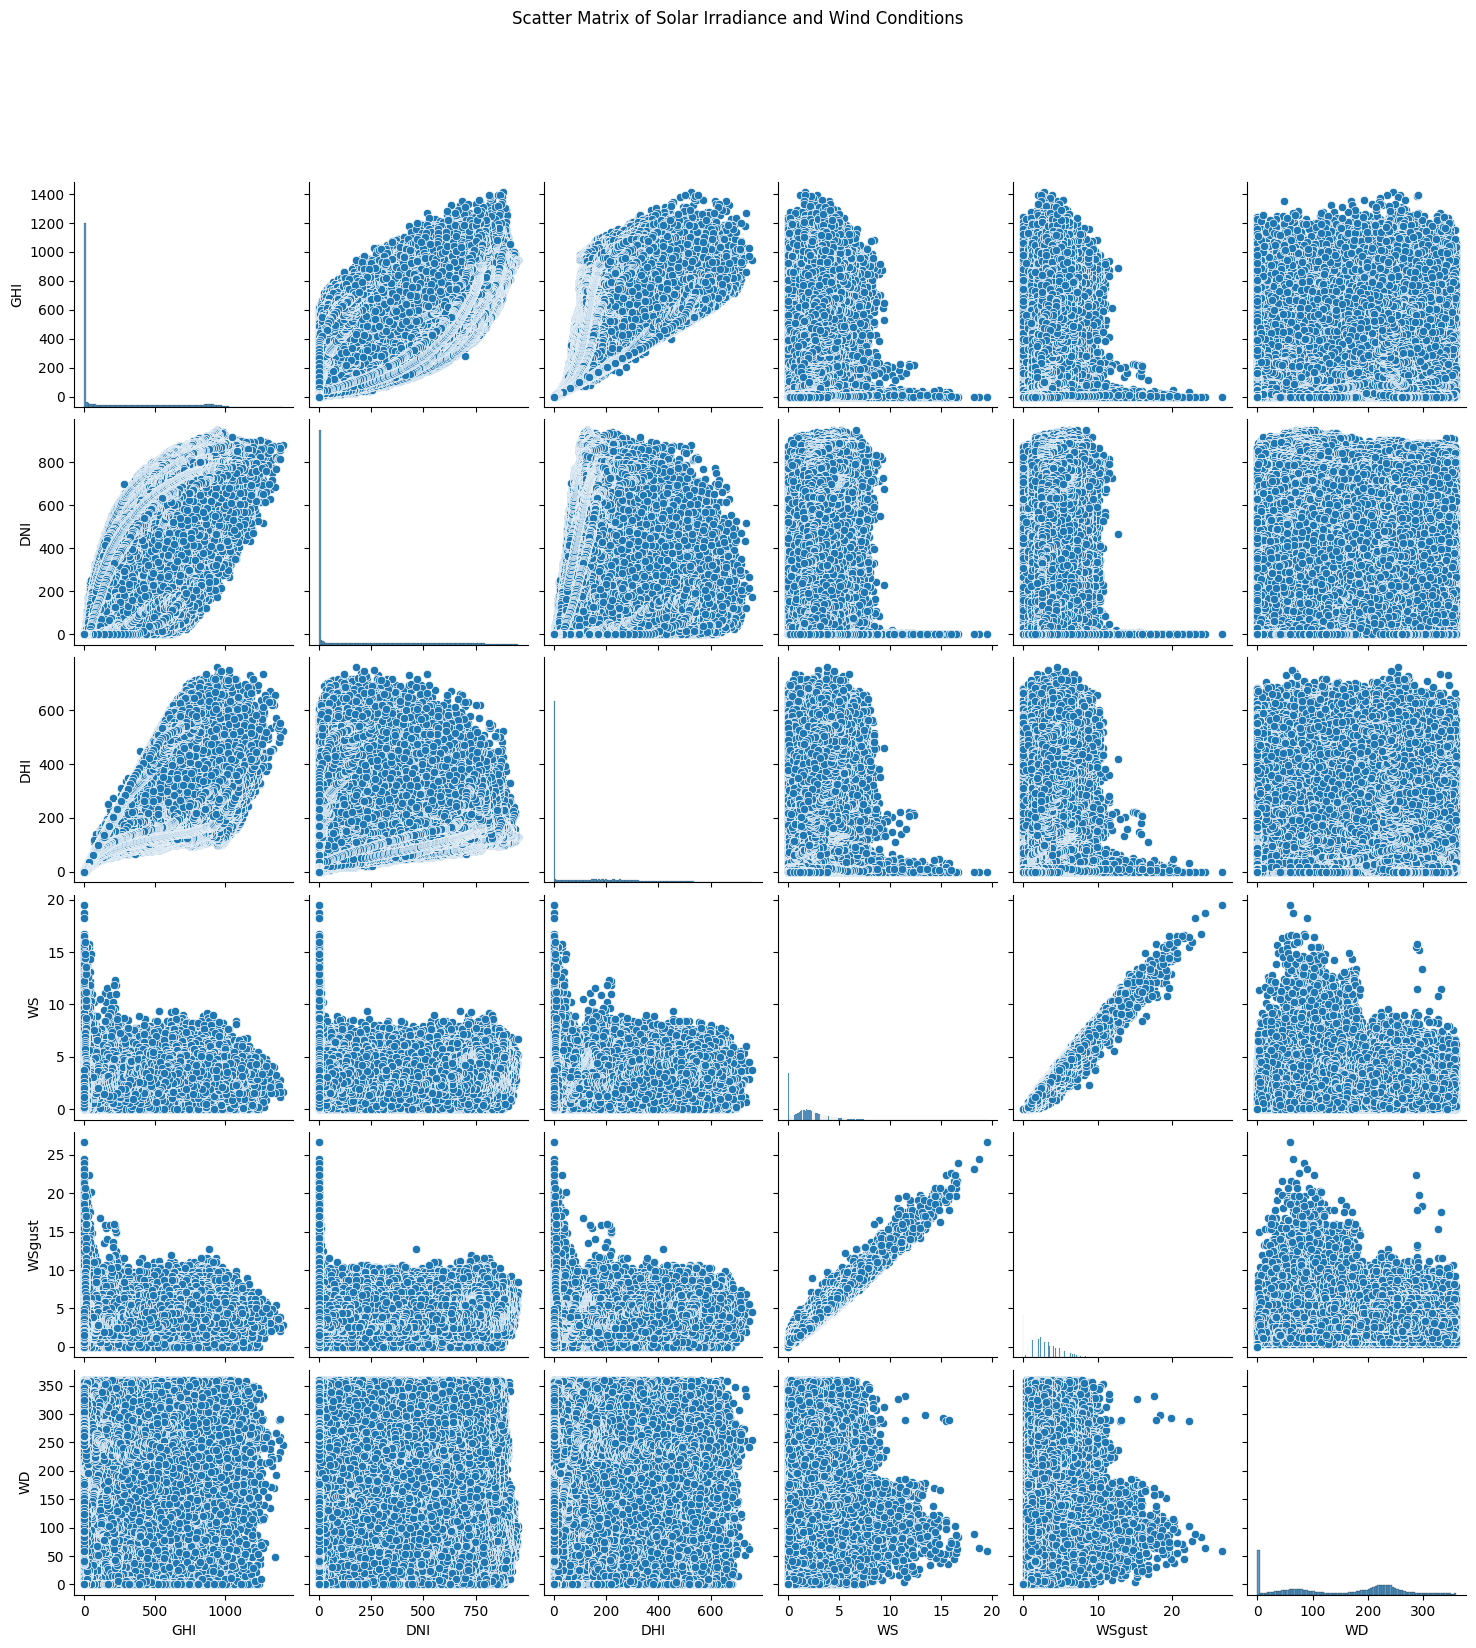

In [35]:
# Plot scatter matrix (pair plot)
sb.pairplot(togo_df[['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']])
plt.suptitle('Scatter Matrix of Solar Irradiance and Wind Conditions', y=1.1)
plt.show()


### Wind Analysis

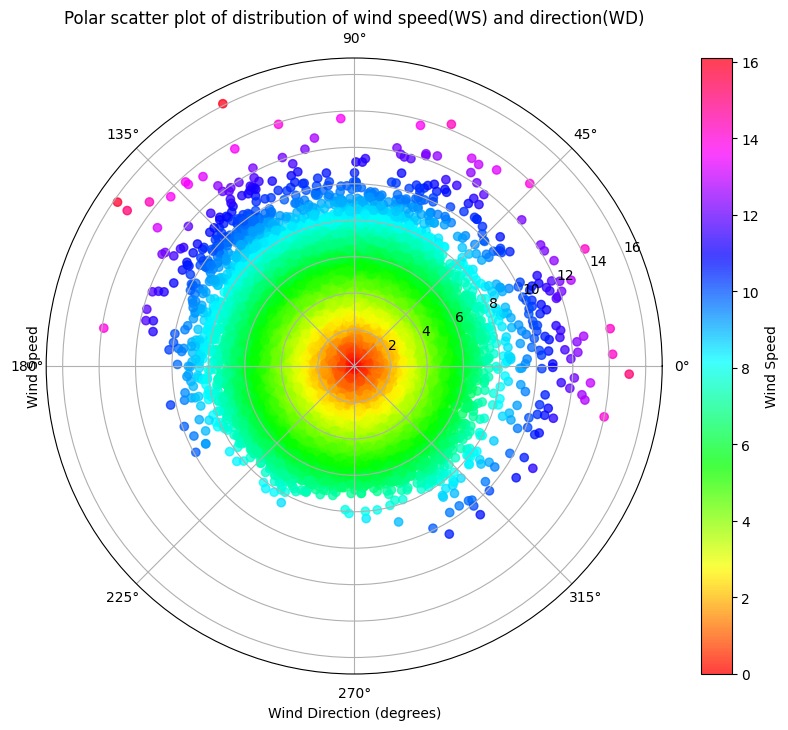

In [23]:
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='polar')

# convert wind direction from degrees to radians
wd_rad = np.deg2rad(togo_df['WD'])

# scatter plot with WD as the angle and WS as radius
scatter = ax.scatter(wd_rad, togo_df['WS'], c=togo_df['WS'], cmap='hsv', alpha=0.75)

plt.colorbar(scatter, ax=ax, label='Wind Speed')


ax.set_xlabel('Wind Direction (degrees)')
ax.set_ylabel('Wind Speed')

# Show plot
plt.title('Polar scatter plot of distribution of wind speed(WS) and direction(WD)')
plt.show()


### Temperature Analysis

In [24]:
togo_df.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      231.718786     151.258469     116.444352     226.144375   
std       321.691953     250.956962     156.520714     317.346938   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  
count  525600.000000  
mean       33.543330  
std        12.769277  
min        13.100000  
25%        23.600000  
50%        28.400000  
75%        43.000000  
max        94.600000

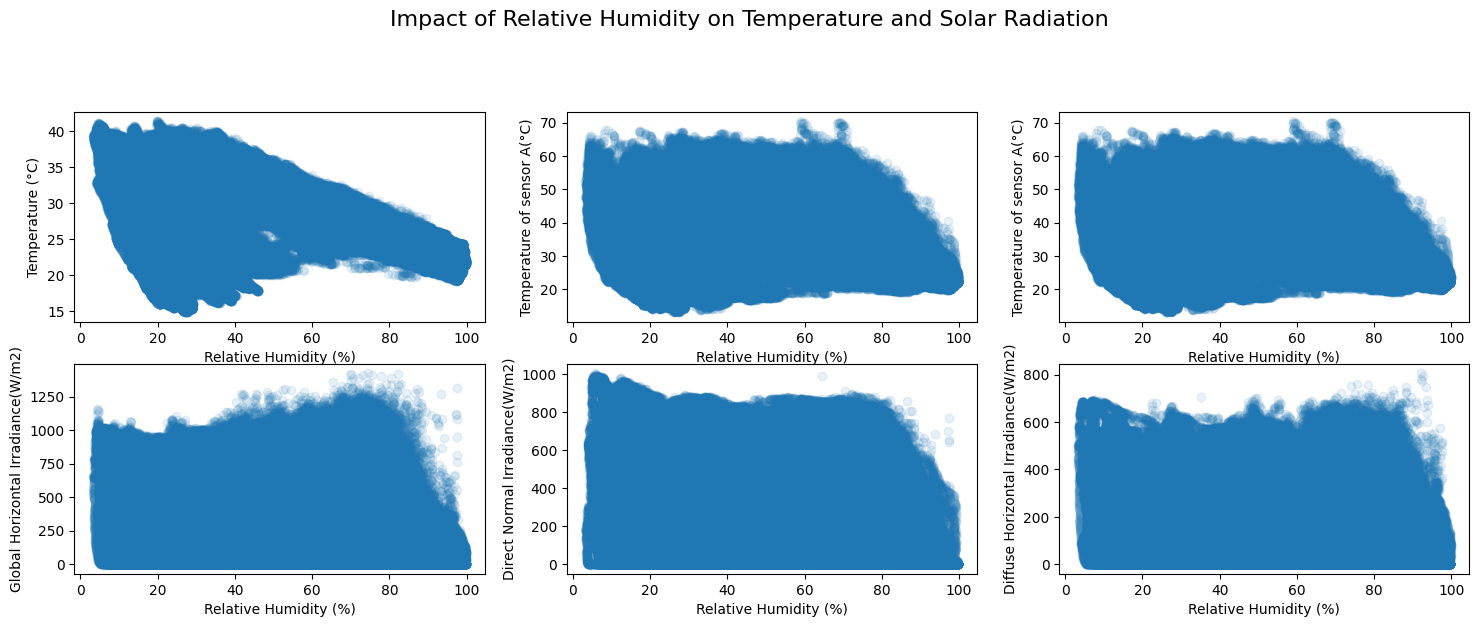

In [25]:
plt.figure(figsize = [18, 6])
plt.subplot(2, 3, 1)
sb.regplot(data = togo_df, x = 'RH', y = 'Tamb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')

plt.subplot(2, 3, 2)
sb.regplot(data = togo_df, x = 'RH', y = 'TModA', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature of sensor A(°C)')

plt.subplot(2, 3, 3)
sb.regplot(data = togo_df, x = 'RH', y = 'TModA', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature of sensor A(°C)')

plt.subplot(2, 3, 4)
sb.regplot(data = togo_df, x = 'RH', y = 'GHI', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Global Horizontal Irradiance(W/m2)')

plt.subplot(2, 3, 5)
sb.regplot(data = togo_df, x = 'RH', y = 'DNI', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Direct Normal Irradiance(W/m2)')

plt.subplot(2, 3, 6)
sb.regplot(data = togo_df, x = 'RH', y = 'DHI', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Diffuse Horizontal Irradiance(W/m2)')

plt.suptitle('Impact of Relative Humidity on Temperature and Solar Radiation', y=1.05, fontsize=16)
plt.show()

### Histograms

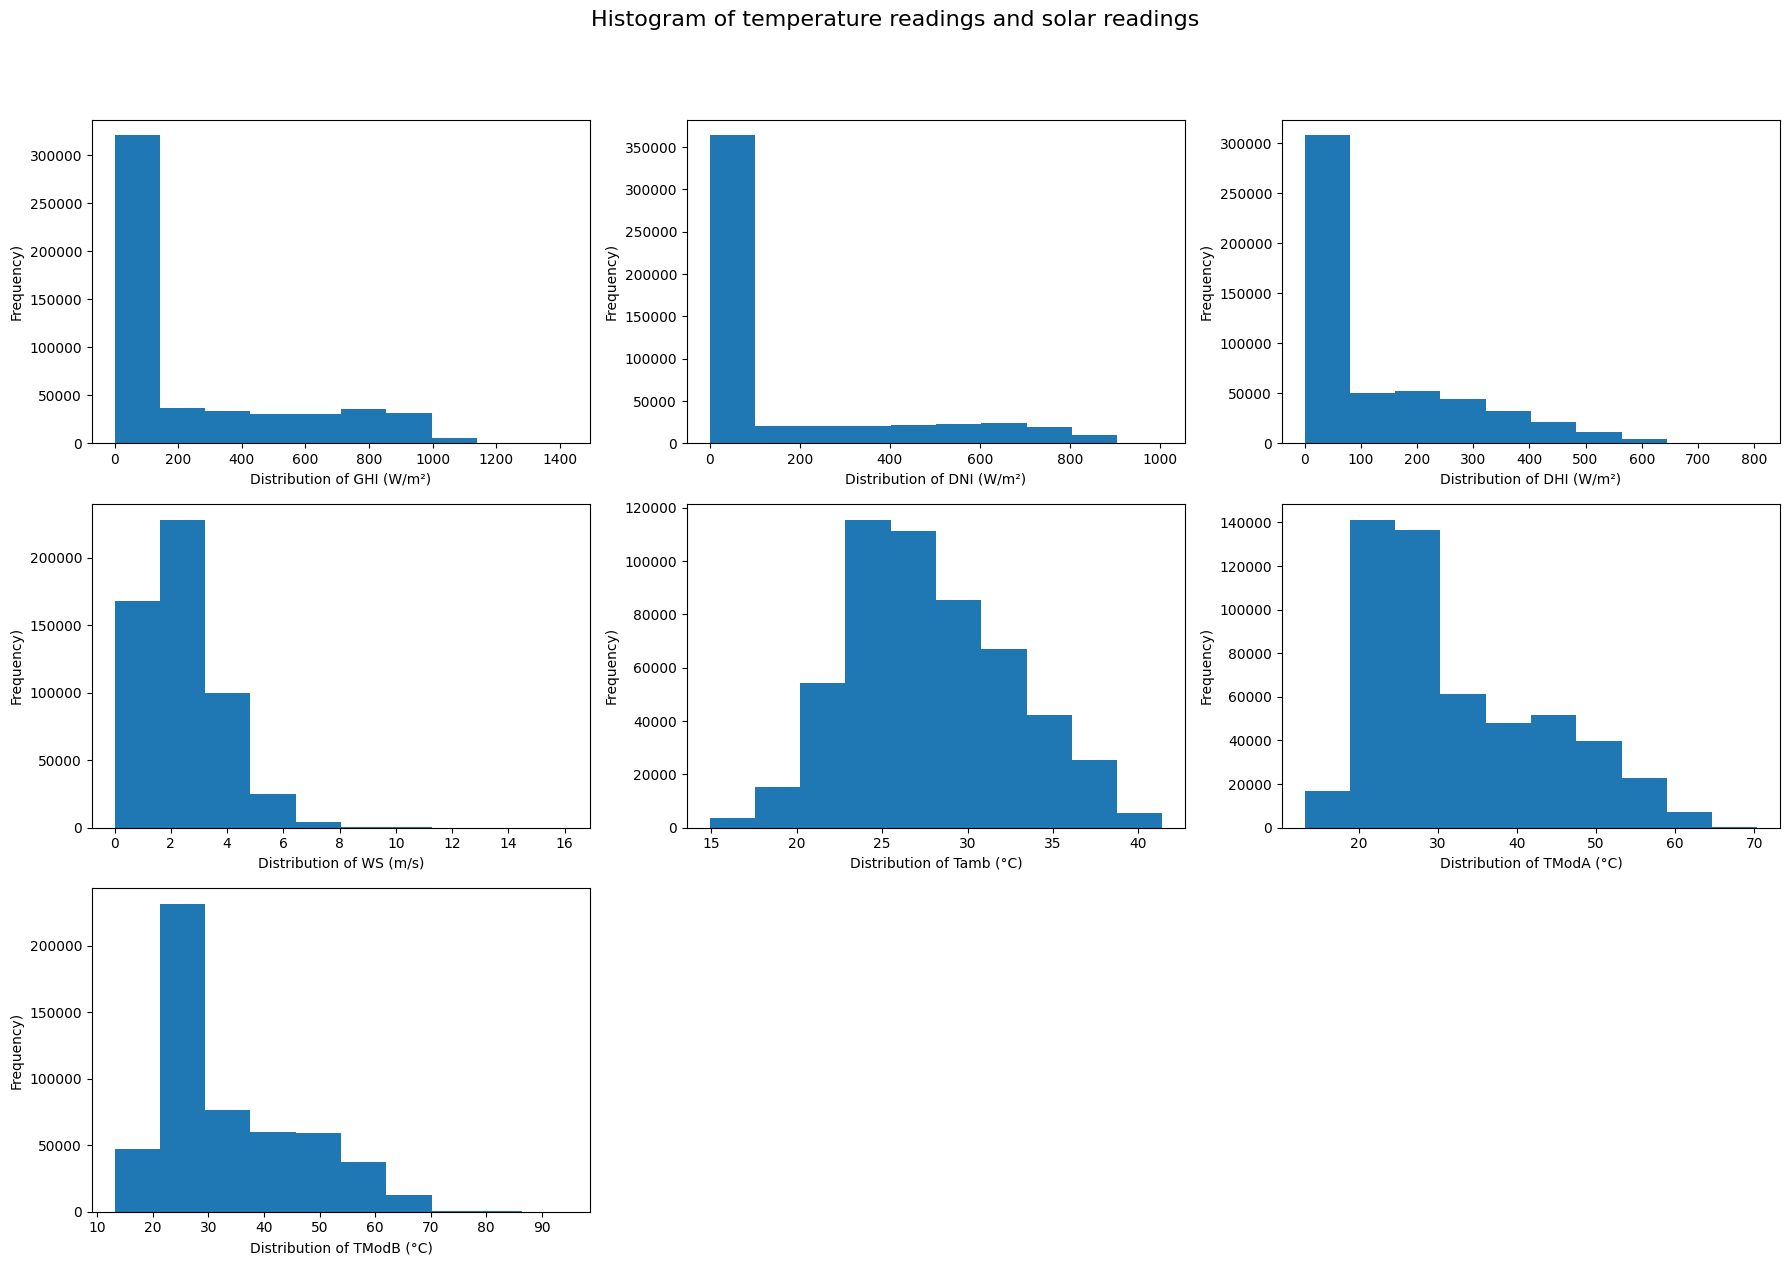

In [26]:
# variables we want to create histograms for

plt.figure(figsize = [18, 12])

plt.subplot(3, 3, 1)
togo_df['GHI'].plot.hist()
plt.xlabel('Distribution of GHI (W/m²)')
plt.ylabel('Frequency)')

plt.subplot(3, 3, 2)
togo_df['DNI'].plot.hist()
plt.xlabel('Distribution of DNI (W/m²)')
plt.ylabel('Frequency)')

plt.subplot(3, 3, 3)
togo_df['DHI'].plot.hist()
plt.xlabel('Distribution of DHI (W/m²)')
plt.ylabel('Frequency)')

plt.subplot(3, 3, 4)
togo_df['WS'].plot.hist()
plt.xlabel('Distribution of WS (m/s)')
plt.ylabel('Frequency)')

plt.subplot(3, 3, 5)
togo_df['Tamb'].plot.hist()
plt.xlabel('Distribution of Tamb (°C)')
plt.ylabel('Frequency)')

plt.subplot(3, 3, 6)
togo_df['TModA'].plot.hist()
plt.xlabel('Distribution of TModA (°C)')
plt.ylabel('Frequency)')

plt.subplot(3, 3, 7)
togo_df['TModB'].plot.hist()
plt.xlabel('Distribution of TModB (°C)')
plt.ylabel('Frequency)')



plt.suptitle('Histogram of temperature readings and solar readings', y=1.05, fontsize=16)

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()



### Z-score Analysis
>a measurement of how many standard deviations away a data point is from the mean of a distribution. A z-score of 0 indicates that the data point’s score is the same as the mean score. A positive z-score indicates that the data point is above average, while a negative z-score indicates that the data point is below average.

```
Z = (X−μ)/σ
where 
𝑋 is the data point, 
μ is the mean of the data, and 
σ is the standard deviation.
```

In [27]:

import sys
sys.path.append('../scripts/')
from calculations import calculate_z_scores

In [28]:
togo_df.head(2)

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  WSstdev  \
Date                                                                      
2021-10-25  0.0  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1      0.4   
2021-10-25  0.0  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6      0.4   

               WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
Date                                                                    
2021-10-25  227.6      1.1  977         0            0.0   24.7   24.4  
2021-10-25  229.3      0.7  977         0            0.0   24.7   24.4

In [29]:
togo_df.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      231.718786     151.258469     116.444352     226.144375   
std       321.691953     250.956962     156.520714     317.346938   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  
count  525600.000000  
mean       33.543330  
std        12.769277  
min        13.100000  
25%        23.600000  
50%        28.400000  
75%        43.000000  
max        94.600000

In [30]:
#cols to calculate the z-scores
cols = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']

z_scores, flagged_data_pts = calculate_z_scores(togo_df, cols)

#print the z-scores and the flagged data points
print("Z-Scores :\n", z_scores)
print("\n Flagged outliers which deviate from the mean :\n", flagged_data_pts)

Z-Scores :
                  GHI       DNI       DHI        WS      Tamb
Date                                                        
2021-10-25 -0.720313 -0.602727 -0.743956 -1.003710 -0.620382
2021-10-25 -0.720313 -0.602727 -0.743956 -0.866974 -0.620382
2021-10-25 -0.720313 -0.602727 -0.743956 -0.798606 -0.620382
2021-10-25 -0.720313 -0.602727 -0.743956 -0.798606 -0.620382
2021-10-25 -0.720313 -0.602727 -0.743956 -0.730237 -0.620382
...              ...       ...       ...       ...       ...
2022-10-24 -0.720313 -0.602727 -0.743956 -1.619025 -0.536313
2022-10-24 -0.720313 -0.602727 -0.743956 -1.619025 -0.515296
2022-10-24 -0.720313 -0.602727 -0.743956 -1.619025 -0.515296
2022-10-24 -0.720313 -0.602727 -0.743956 -1.619025 -0.494279
2022-10-25 -0.720313 -0.602727 -0.743956 -1.619025 -0.494279

[525600 rows x 5 columns]

 Flagged outliers which deviate from the mean :
             GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  WSstdev  ...  \
Date                                  

>Negative Z-Score: A negative Z-score indicates that the data point is below the mean. For example, a Z-score of -0.5 means the data point is 0.5 standard deviations below the mean.

>An element having a z-score of less than 0 represents that the element is less than the mean.




In [31]:
print(z_scores.max(), z_scores.min())

GHI     3.706286
DNI     3.399955
DHI     4.403611
WS      9.388270
Tamb    2.868466
dtype: float64 GHI    -0.720313
DNI    -0.602727
DHI    -0.743956
WS     -1.619025
Tamb   -2.701080
dtype: float64


In [32]:
# Filter z-scores 
positive_z_scores = z_scores[z_scores > 0]

negative_z_scores = z_scores[z_scores < 0]

print(z_scores.count(), positive_z_scores.count()+negative_z_scores.count(), positive_z_scores.count(), negative_z_scores.count())


GHI     525600
DNI     525600
DHI     525600
WS      525600
Tamb    525600
dtype: int64 GHI     525600
DNI     525600
DHI     525600
WS      525600
Tamb    525600
dtype: int64 GHI     181541
DNI     150998
DHI     198635
WS      243028
Tamb    241608
dtype: int64 GHI     344059
DNI     374602
DHI     326965
WS      282572
Tamb    283992
dtype: int64


In [33]:
outliers_ghi = flagged_data_pts[flagged_data_pts['GHI_outlier']==True]
outliers_dni = flagged_data_pts[flagged_data_pts['DNI_outlier']==True]
outliers_dhi = flagged_data_pts[flagged_data_pts['DHI_outlier']==True]
outliers_ws = flagged_data_pts[flagged_data_pts['WS_outlier']==True]
outliers_tamp = flagged_data_pts[flagged_data_pts['Tamb_outlier']==True]

print(f"Number of outlies in GHI: {outliers_ghi.count().sum()} \n"
      f"DNI: {outliers_dni.count().sum()} \n"
      f"DHI: {outliers_dhi.count().sum()} \n"
      f"WS: {outliers_ws.count().sum()} \n"
      f"Tamb: {outliers_tamp.count().sum()}")



Number of outlies in GHI: 8478 
DNI: 28674 
DHI: 92205 
WS: 94770 
Tamb: 0


### Bubble charts

>A bubble chart is primarily used to depict and show relationships between numeric variables.

/home/izzy/anaconda3/envs/kiam/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


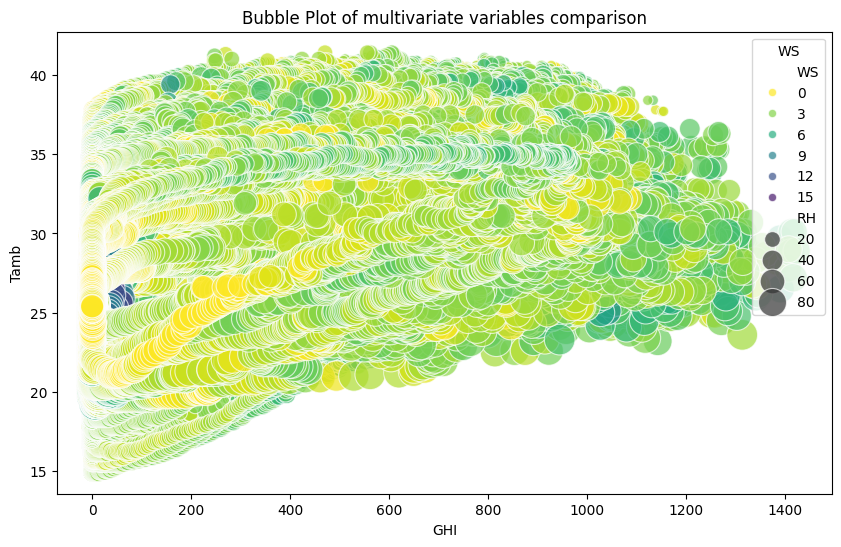

In [34]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=togo_df, x='GHI', y='Tamb', size='RH', sizes=(50, 500), hue='WS', palette='viridis_r', legend='brief', alpha=0.7)

# Add labels and title
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Bubble Plot of multivariate variables comparison')
plt.legend(title='WS')

plt.show();
